In [1]:
import context
import torch
import torch.nn as nn
from diffusion_models.models import UNet
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.fft import fft2, ifft2, fftshift, ifftshift
from torch.distributions import Normal, MultivariateNormal
from diffusion_models.mri_forward.undersampling_mask import *

In [2]:
train = FashionMNIST("data", train=True, download=True, transform=ToTensor())
test = FashionMNIST("data", train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train, batch_size=5000)
test_loader = DataLoader(test, batch_size=len(test))

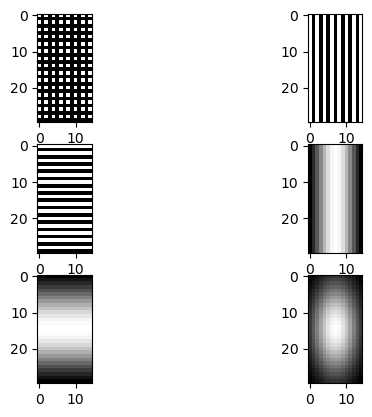

In [3]:
sample = torch.randn((50000, 1, 30, 15))

import matplotlib as mpl
mpl.rc('image', cmap='gray')

fig, ax = plt.subplots(3,2)
ax[0,0].imshow(naive_undersampling2d(sample.shape, 2))
ax[0,1].imshow(naive_undersampling1d_v(sample.shape, 2))
ax[1,0].imshow(naive_undersampling1d_h(sample.shape, 2))
ax[1,1].imshow(gaussian_kernel1d_v(sample.shape, 0.3))
ax[2,0].imshow(gaussian_kernel1d_h(sample.shape, 0.3))
ax[2,1].imshow(gaussian_kernel2d(sample.shape, 0.3))